In [1]:
#Import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import string
import operator
from sklearn.feature_extraction.text import CountVectorizer
import pickle

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kledesma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df = pd.read_csv('../../yelp-dataset/yelp_reviews.csv')

In [ ]:
#Extracting the fields I want
df2 = df[['name', 'city', 'state', 'stars', 'review_stars', 'text', 'date']]

In [121]:
df2.city.unique()

array(['Champaign', 'Aurora', 'Thornhill', 'Richmond Hill', 'Phoenix',
       'Cleveland', 'Montréal', 'Tempe', 'Plum', 'Toronto', 'Calgary',
       'Strongsville', 'Las Vegas', 'Mesa', 'Milton', 'Scottsdale',
       'Parma', 'Beachwood', 'Fairview Park', 'Avalon', 'East York',
       'Charlotte', 'Anjou', 'Dorval', 'Fort Mill', 'Gastonia',
       'Carnegie', 'Etobicoke', 'Streetsboro', 'Pittsburgh', 'Rock Hill',
       'Parma Heights', 'Scarborough', 'Mississauga', 'Coraopolis',
       'Markham', 'Madison', 'Stoughton', 'Westlake', 'Henderson', 'Ajax',
       'Pepper Pike', 'North York', 'Chandler', 'Huntersville', 'Whtiby',
       'Avondale', 'Oakville', 'Rosemere', 'Shaker Heights', 'Willowick',
       'Montreal-Nord', 'Saint-Laurent', 'Outremont', 'Pineville',
       'North Las Vegas', 'Elyria', 'Woodmere', 'Brunswick', 'Matthews',
       'Concord', 'Bradford', 'Mentor On The Lake', 'Boisbriand',
       'Davidson', 'Sewickley', 'Brampton', 'De Forest', 'Laveen Village',
       'Mid

In [92]:
print(df2.head())

print(df2.describe())

print(min(df2['date']))
print(max(df2['date']))
print(df2.info())

                  name       city state  stars  review_stars  \
0  The Empanadas House  Champaign    IL    4.5             5   
1  The Empanadas House  Champaign    IL    4.5             5   
2  The Empanadas House  Champaign    IL    4.5             2   
3  The Empanadas House  Champaign    IL    4.5             5   
4  The Empanadas House  Champaign    IL    4.5             5   

                                                text                 date  
0  I love the empanadas from the Empanadas House!...  2013-04-11 18:36:15  
1  I ordered feta cheese and spinach empanadas an...  2017-09-21 17:45:53  
2  I went to the place on Green St today. I went ...  2014-10-07 01:07:00  
3  These empanadas are excellent- we are Argentin...  2013-07-10 18:26:33  
4  These empanadas are HUGE and in my opinion bet...  2019-05-07 03:12:10  
              stars  review_stars
count  4.222976e+06  4.222976e+06
mean   3.761974e+00  3.760848e+00
std    6.231684e-01  1.392453e+00
min    1.000000e+00  1.

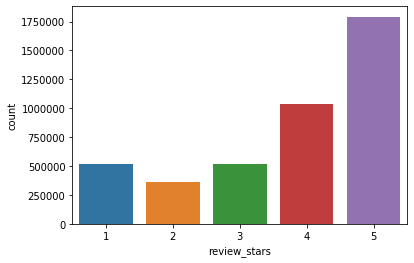

In [89]:
#Looking at the rating distribution
sns.countplot(x="review_stars", data = df2)

In [93]:
#Extracting only reviews that are 1,2,4, or 5 stars
df5 = df2[(df2['review_stars'] == 1) | (df2['review_stars'] == 2) | (df2['review_stars'] == 4) | (df2['review_stars'] == 5)]
df5

,name,city,state,stars,review_stars,text,date
0,The Empanadas House,Champaign,IL,4.5,5,I love the empanadas from the Empanadas House!...,2013-04-11 18:36:15
1,The Empanadas House,Champaign,IL,4.5,5,I ordered feta cheese and spinach empanadas an...,2017-09-21 17:45:53
2,The Empanadas House,Champaign,IL,4.5,2,I went to the place on Green St today. I went ...,2014-10-07 01:07:00
3,The Empanadas House,Champaign,IL,4.5,5,These empanadas are excellent- we are Argentin...,2013-07-10 18:26:33
4,The Empanadas House,Champaign,IL,4.5,5,These empanadas are HUGE and in my opinion bet...,2019-05-07 03:12:10
...,...,...,...,...,...,...,...
4222968,Yao Fine Chinese Cuisine,Gilbert,AZ,4.0,5,It had been awhile since we last dined here. ...,2019-11-24 07:41:46
4222969,Yao Fine Chinese Cuisine,Gilbert,AZ,4.0,1,"Seat yourself type of place, ordered fried won...",2019-11-27 01:53:07
4222971,Yao Fine Chinese Cuisine,Gilbert,AZ,4.0,5,Came for dinner based on reviews. Service was ...,2019-10-27 02:47:25
4222972,Hooters,Phoenix,AZ,2.0,1,"I hate to give a one star, but this place need...",2019-01-19 03:05:09


In [94]:
#Creating sentiment value
df5['sentiment'] = np.where(df5['review_stars'] < 3, 'Negative', 'Positive')
df5.head()

C:\Users\kledesma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,city,state,stars,review_stars,text,date,sentiment
0,The Empanadas House,Champaign,IL,4.5,5,I love the empanadas from the Empanadas House!...,2013-04-11 18:36:15,Positive
1,The Empanadas House,Champaign,IL,4.5,5,I ordered feta cheese and spinach empanadas an...,2017-09-21 17:45:53,Positive
2,The Empanadas House,Champaign,IL,4.5,2,I went to the place on Green St today. I went ...,2014-10-07 01:07:00,Negative
3,The Empanadas House,Champaign,IL,4.5,5,These empanadas are excellent- we are Argentin...,2013-07-10 18:26:33,Positive
4,The Empanadas House,Champaign,IL,4.5,5,These empanadas are HUGE and in my opinion bet...,2019-05-07 03:12:10,Positive


In [122]:
df6 = df5.sample(n=20000, random_state = 50) 
df6


KeyboardInterrupt



In [100]:
#Taking large sample to create the model
df6 = df5[:20000]
df6 = df6.reset_index()

#creating x, y to be used later for ML model
x = df6['text']
y = df6['sentiment']


df6

,index,name,city,state,stars,review_stars,text,date,sentiment
0,0,The Empanadas House,Champaign,IL,4.5,5,I love the empanadas from the Empanadas House!...,2013-04-11 18:36:15,Positive
1,1,The Empanadas House,Champaign,IL,4.5,5,I ordered feta cheese and spinach empanadas an...,2017-09-21 17:45:53,Positive
2,2,The Empanadas House,Champaign,IL,4.5,2,I went to the place on Green St today. I went ...,2014-10-07 01:07:00,Negative
3,3,The Empanadas House,Champaign,IL,4.5,5,These empanadas are excellent- we are Argentin...,2013-07-10 18:26:33,Positive
4,4,The Empanadas House,Champaign,IL,4.5,5,These empanadas are HUGE and in my opinion bet...,2019-05-07 03:12:10,Positive
...,...,...,...,...,...,...,...,...,...
19995,22687,Korean Grill House,Toronto,ON,3.0,4,Had to eat here again!\n$ 16 all you can eat K...,2013-04-18 13:40:47,Positive
19996,22690,Korean Grill House,Toronto,ON,3.0,5,This is the best place for Korean grilled food...,2012-03-15 23:04:36,Positive
19997,22691,Korean Grill House,Toronto,ON,3.0,4,Been to this restaurant a few times over the l...,2017-07-02 18:30:18,Positive
19998,22692,Korean Grill House,Toronto,ON,3.0,1,Korean Grill House \nCame here on a Monday. It...,2014-04-29 02:08:08,Negative


In [20]:
#Creating text analyzer
def text_process(text):

    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


print(stopwords.words('english'))

sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
processed_text = text_process(sample_text)


print(f"This is the original text: {sample_text}")
print(f"This is the converted text: {processed_text}")

In [111]:
#Creating the countvectorizor, transforming the data for the model
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer=text_process)   
cv_fit=cv.fit_transform(df6['text'])

#converting into a sparse matrix (will have to repeat for web-scraped data)
X = cv.transform(x)


#Saving vectorizer
pickle.dump(cv, open("vectorizer.pickle", "wb"))


In [112]:
#Loading Vectorizor
loaded_vectorizor = pickle.load(open("vectorizer.pickle", 'rb'))

In [117]:
#Splitting data to create model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#importing specific ML model, fitting model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

#testing model
predictions = model.predict(X_test)

#Printing results of model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

#Saving the model
import pickle
pickle.dump(model, open("model.pickle", 'wb'))

[[1205  239]
 [ 167 4389]]


              precision    recall  f1-score   support

    Negative       0.88      0.83      0.86      1444
    Positive       0.95      0.96      0.96      4556

    accuracy                           0.93      6000
   macro avg       0.91      0.90      0.91      6000
weighted avg       0.93      0.93      0.93      6000



In [114]:
#Loading the model
loaded_model = pickle.load(open("model.pickle", 'rb'))

result_val = loaded_model.score(X_train, y_train)
result_test = loaded_model.score(X_test, y_test)


#printing results
print(result_val)
print(result_test)


#Loading Vectorizor
loaded_vectorizor = pickle.load(open("vectorizer.pickle", 'rb'))

0.9604285714285714
0.9323333333333333


In [115]:
#Keep running to see different samples
from random import randint
n = randint(1, len(df6)-1)
#n = 3291
print(f"Randomizer ID: {n}\n---------------------------------")

#Pulling up info for sample review
sample_review = df6['text'][n]
actual = df6['review_stars'][n]
if actual == 1 | 2:
    actual = 'Negative'
else: actual = 'Positive'
restaurant = df6['name'][n]


review_transformed = cv.transform([sample_review])
      
      
#generating predicted score value      
predicted = loaded_model.predict(review_transformed)[0]

if predicted == actual:
    status = 'Success'
else: status = 'Fail'
        
print(f"Restaurant Name: {restaurant}")
print(f"Review Text: {sample_review} \n")
print(f"ML Predicted Yelp Review Score: {predicted}")
print(f"Actual Yelp Review Score: {actual}\n")
print(f"Status: {status}")

Randomizer ID: 6849
---------------------------------
Restaurant Name: Garcia's
Review Text: Tampico chicken was recommended by the waitress and did not disappoint.  The food was fresh, nicely presented, and had excellent flavor.  Visited on a Thursday night at 5:30 p.m.  The place was quiet and the service great.  Customers started arriving in mass around 6.  The portions were generous and although the interior was more bar-like than Mexican, it didn't disappointment.  The neighborhood was somewhat "shady", but the food made up for it.  Will go again. 

ML Predicted Yelp Review Score: Positive
Actual Yelp Review Score: Positive

Status: Success


In [138]:
#Bringing in web scraping code
web_scrapedf = pd.read_csv("../web_scrape_csv")
results = web_scrapedf
print(web_scrapedf)
print(type(web_scrapedf))

                                                    0
0   We've been here at least once a weekFriendly s...
1   Another new spot on the block for boba, and I'...
2   While my checkins don't reflect it anymore (my...
3   This place is amazingly cute inside. The staff...
4   I didn't think I would have to update my revie...
5   One Zo Boba is pre-tea awesome! I've been eyei...
6   FAV boba shop in OTPTheir house made boba is a...
7   I have been to One Zo boba at least 10 times w...
8   The best boba place in ATL. Hands down! I live...
9   One Zo Boba sits in a small shopping center ri...
10  I've been seeing people post about One Zo with...
11  Such a cute & vibrant boba tea place!!! One Zo...
12  One Zo finally opened! We went during soft-ope...
13  My taro milk tea was amazing. I want to go bac...
14  I like the fact that this place is the only on...
15  I saw a OneZo was opening up in Atlanta and I ...
16  The drinks in this shop are all amazing. I ord...
17  I love this place. They 

In [133]:
#Looping through the web-scraped reviews to have the ML make predictions on each review
for label, row in results.iterrows():
    result = []
    text = row['Reviews']
    #print(text)
    text_transform = loaded_vectorizor.transform([text])
    #print(text_transform)[0]
    ml_prediction = loaded_model.predict(text_transform)[0]
    results.at[label, 'ml_predictions'] = ml_prediction

    
#Extracting the only two columns we need
scrape_results_df = web_scrapedf[['Reviews', 'ml_predictions']]
print(scrape_results_df)

                                              Reviews ml_predictions
0   First time visit since the "Covid" event.  Hav...       Negative
1   This has to be THEE BEST CHICKEN SANDWICH IN A...       Positive
2   Please support Atlanta's famous family owned r...       Positive
3   I must say after trying the one in Nashville, ...       Positive
4   I almost always get fried chicken when I come ...       Positive
..                                                ...            ...
75  There wasn't anything wrong with my meal, but ...       Positive
76  Don't be weary of a line because they move pre...       Positive
77  I absolutely love this place! I've never been ...       Positive
78  There's not enough good things to say about Ha...       Positive
79  I've been to Hattie B's Hot Chicken a few time...       Positive

[80 rows x 2 columns]


In [136]:
#Creating list of positive words
positive_wordcloud = scrape_results_df[scrape_results_df['ml_predictions'] == 'Positive']

positivecv = CountVectorizer(analyzer=text_process)   
positive_fit=positivecv.fit_transform(positive_wordcloud['Reviews'])

#creating key value dicitionary pair of counts
positive_word_list = positivecv.get_feature_names();    
positive_count_list = positive_fit.toarray().sum(axis=0)   


#Grouping the words + counts, solving for int64 serialization errors
positive_words = dict(zip(positive_word_list, positive_count_list))
positive_sorted = sorted(positive_words.items(), key=operator.itemgetter(1), reverse=True)
positive_final = [(p[0], int(p[1])) for p in positive_sorted]

#Printing results
positive_final = positive_final[:99]
positive_final


[('chicken', 169),
 ('hot', 82),
 ('good', 75),
 ('fried', 58),
 ('Hattie', 53),
 ('food', 53),
 ('Bs', 45),
 ('got', 45),
 ('cheese', 41),
 ('line', 41),
 ('like', 40),
 ('spicy', 39),
 ('sides', 38),
 ('time', 36),
 ('place', 35),
 ('order', 34),
 ('really', 34),
 ('always', 33),
 ('definitely', 33),
 ('heat', 32),
 ('spice', 32),
 ('ordered', 31),
 ('medium', 30),
 ('get', 29),
 ('great', 29),
 ('parking', 29),
 ('Hot', 28),
 ('one', 28),
 ('try', 28),
 ('also', 27),
 ('sandwich', 27),
 ('well', 27),
 ('would', 27),
 ('Ive', 26),
 ('fries', 26),
 ('level', 25),
 ('lot', 25),
 ('pretty', 25),
 ('Im', 24),
 ('long', 24),
 ('beans', 23),
 ('Mac', 22),
 ('go', 22),
 ('sauce', 22),
 ('inside', 21),
 ('meal', 21),
 ('Atlanta', 20),
 ('back', 20),
 ('door', 20),
 ('juicy', 20),
 ('next', 20),
 ('nice', 20),
 ('outside', 20),
 ('mac', 19),
 ('two', 19),
 ('wait', 19),
 ('baked', 18),
 ('dont', 18),
 ('flavor', 18),
 ('little', 18),
 ('pimento', 18),
 ('tenders', 18),
 ('wings', 18),
 ('deli

In [131]:
#Creating list of positive words
positive_wordcloud = scrape_results_df[scrape_results_df['ml_predictions'] == 'Positive']

positivecv = CountVectorizer(analyzer=text_process)   
positive_fit=positivecv.fit_transform(positive_wordcloud['Reviews'])

#creating key value dicitionary pair of counts
positive_word_list = positivecv.get_feature_names();    
positive_count_list = positive_fit.toarray().sum(axis=0)   


#Grouping the words + counts, solving for int64 serialization errors
positive_words = dict(zip(positive_word_list, positive_count_list))
positive_sorted = sorted(positive_words.items(), key=operator.itemgetter(1), reverse=True)
positive_final = [(p[0], int(p[1])) for p in positive_sorted]

#Printing results
positive_final


[('chicken', 169),
 ('hot', 82),
 ('good', 75),
 ('fried', 58),
 ('Hattie', 53),
 ('food', 53),
 ('Bs', 45),
 ('got', 45),
 ('cheese', 41),
 ('line', 41),
 ('like', 40),
 ('spicy', 39),
 ('sides', 38),
 ('time', 36),
 ('place', 35),
 ('order', 34),
 ('really', 34),
 ('always', 33),
 ('definitely', 33),
 ('heat', 32),
 ('spice', 32),
 ('ordered', 31),
 ('medium', 30),
 ('get', 29),
 ('great', 29),
 ('parking', 29),
 ('Hot', 28),
 ('one', 28),
 ('try', 28),
 ('also', 27),
 ('sandwich', 27),
 ('well', 27),
 ('would', 27),
 ('Ive', 26),
 ('fries', 26),
 ('level', 25),
 ('lot', 25),
 ('pretty', 25),
 ('Im', 24),
 ('long', 24),
 ('beans', 23),
 ('Mac', 22),
 ('go', 22),
 ('sauce', 22),
 ('inside', 21),
 ('meal', 21),
 ('Atlanta', 20),
 ('back', 20),
 ('door', 20),
 ('juicy', 20),
 ('next', 20),
 ('nice', 20),
 ('outside', 20),
 ('mac', 19),
 ('two', 19),
 ('wait', 19),
 ('baked', 18),
 ('dont', 18),
 ('flavor', 18),
 ('little', 18),
 ('pimento', 18),
 ('tenders', 18),
 ('wings', 18),
 ('deli

In [118]:
print(type(positive_final))

<class 'list'>


In [130]:
#Creating the list of negative words
negative_wordcloud = scrape_results_df[scrape_results_df['ml_predictions'] == 'Negative']

negativecv = CountVectorizer(analyzer=text_process)   
negative_fit=negativecv.fit_transform(negative_wordcloud['Reviews'])

#creating key value dicitionary pair of counts
negative_word_list = negativecv.get_feature_names();    
negative_count_list = negative_fit.toarray().sum(axis=0)   


negative_words = dict(zip(negative_word_list, negative_count_list))
negative_sorted = sorted(negative_words.items(), key=operator.itemgetter(1), reverse=True)
negative_final = [(n[0], int(n[1])) for n in negative_sorted]


negative_final


[('chicken', 17),
 ('heat', 9),
 ('back', 7),
 ('came', 7),
 ('level', 7),
 ('parking', 7),
 ('tenders', 7),
 ('wait', 7),
 ('also', 6),
 ('hot', 6),
 ('order', 6),
 ('food', 5),
 ('sandwich', 5),
 ('three', 5),
 ('time', 5),
 ('best', 4),
 ('eat', 4),
 ('got', 4),
 ('one', 4),
 ('ordered', 4),
 ('place', 4),
 ('quality', 4),
 ('sauce', 4),
 ('wont', 4),
 ('Bs', 3),
 ('Ive', 3),
 ('Nashville', 3),
 ('cooked', 3),
 ('day', 3),
 ('didnt', 3),
 ('eating', 3),
 ('four', 3),
 ('get', 3),
 ('greens', 3),
 ('home', 3),
 ('lot', 3),
 ('meal', 3),
 ('much', 3),
 ('probably', 3),
 ('restaurant', 3),
 ('right', 3),
 ('salad', 3),
 ('sure', 3),
 ('us', 3),
 ('waffle', 3),
 ('wanted', 3),
 ('wife', 3),
 ('wings', 3),
 ('would', 3),
 ('12', 2),
 ('25', 2),
 ('Atlanta', 2),
 ('First', 2),
 ('Hattie', 2),
 ('amount', 2),
 ('asked', 2),
 ('big', 2),
 ('black', 2),
 ('bland', 2),
 ('bread', 2),
 ('come', 2),
 ('comeback', 2),
 ('dont', 2),
 ('either', 2),
 ('extra', 2),
 ('eye', 2),
 ('face', 2),
 ('fia

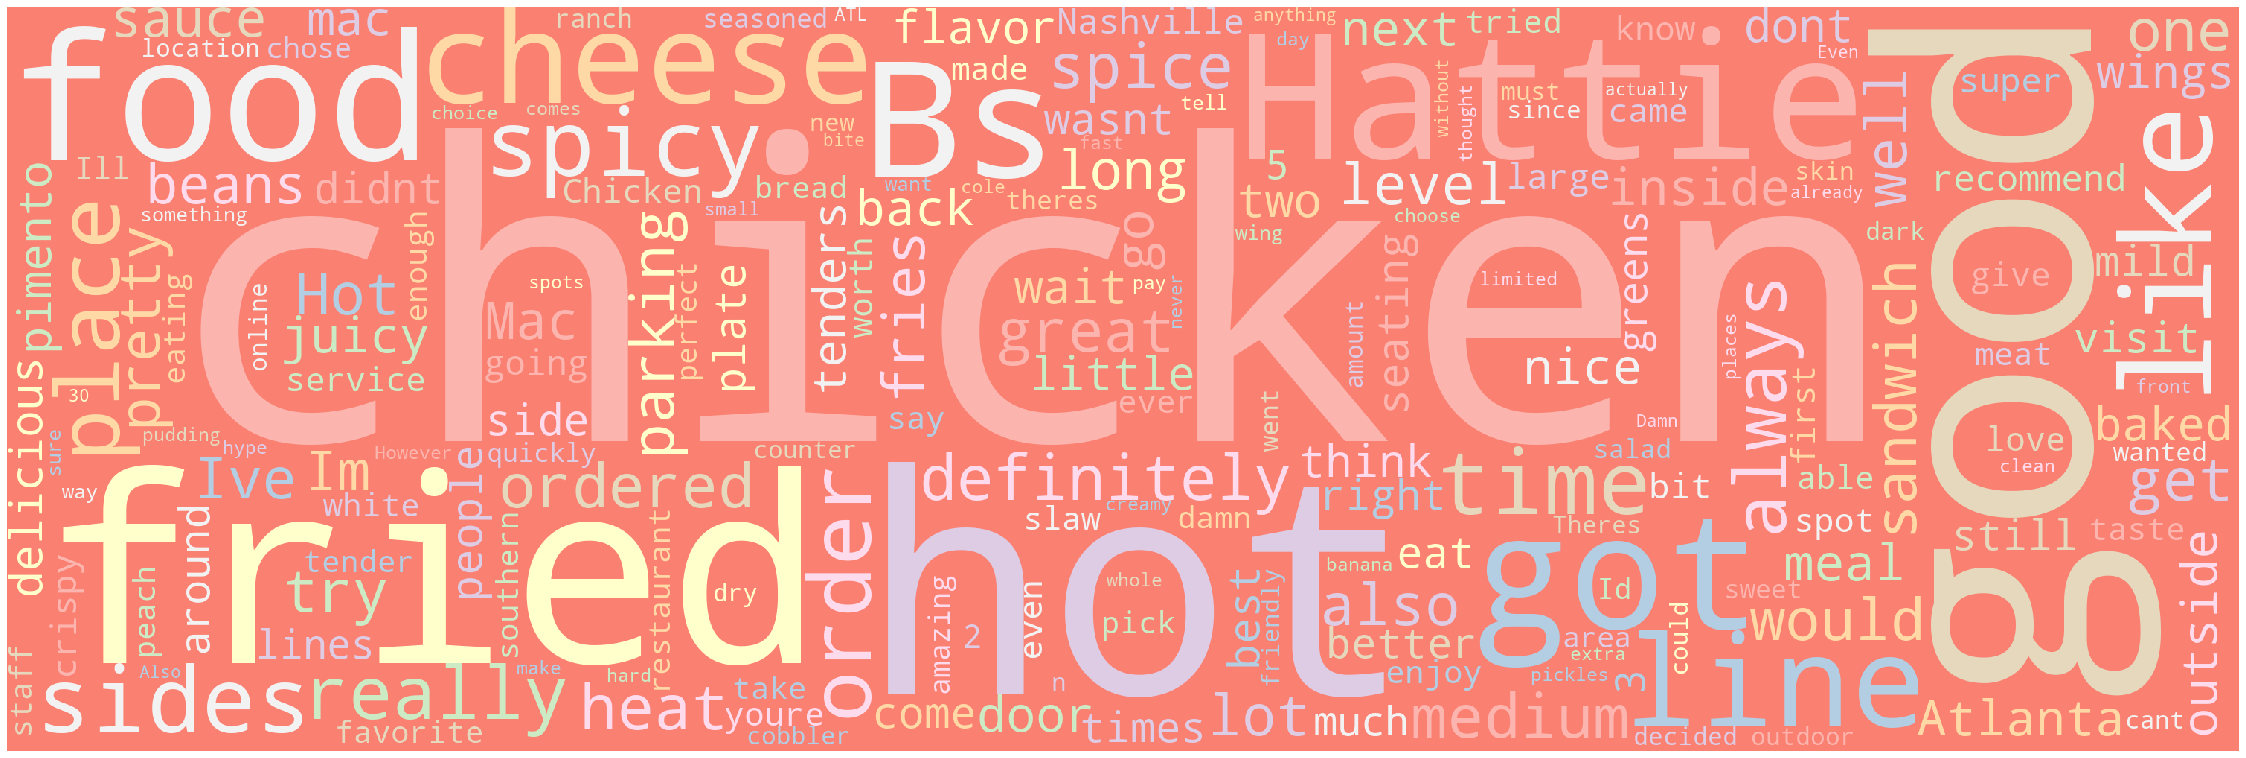

In [127]:
#plotting positive word cloud
data = positive_words
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
    
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 1000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate_from_frequencies(data)
# Plot
plot_cloud(wordcloud)

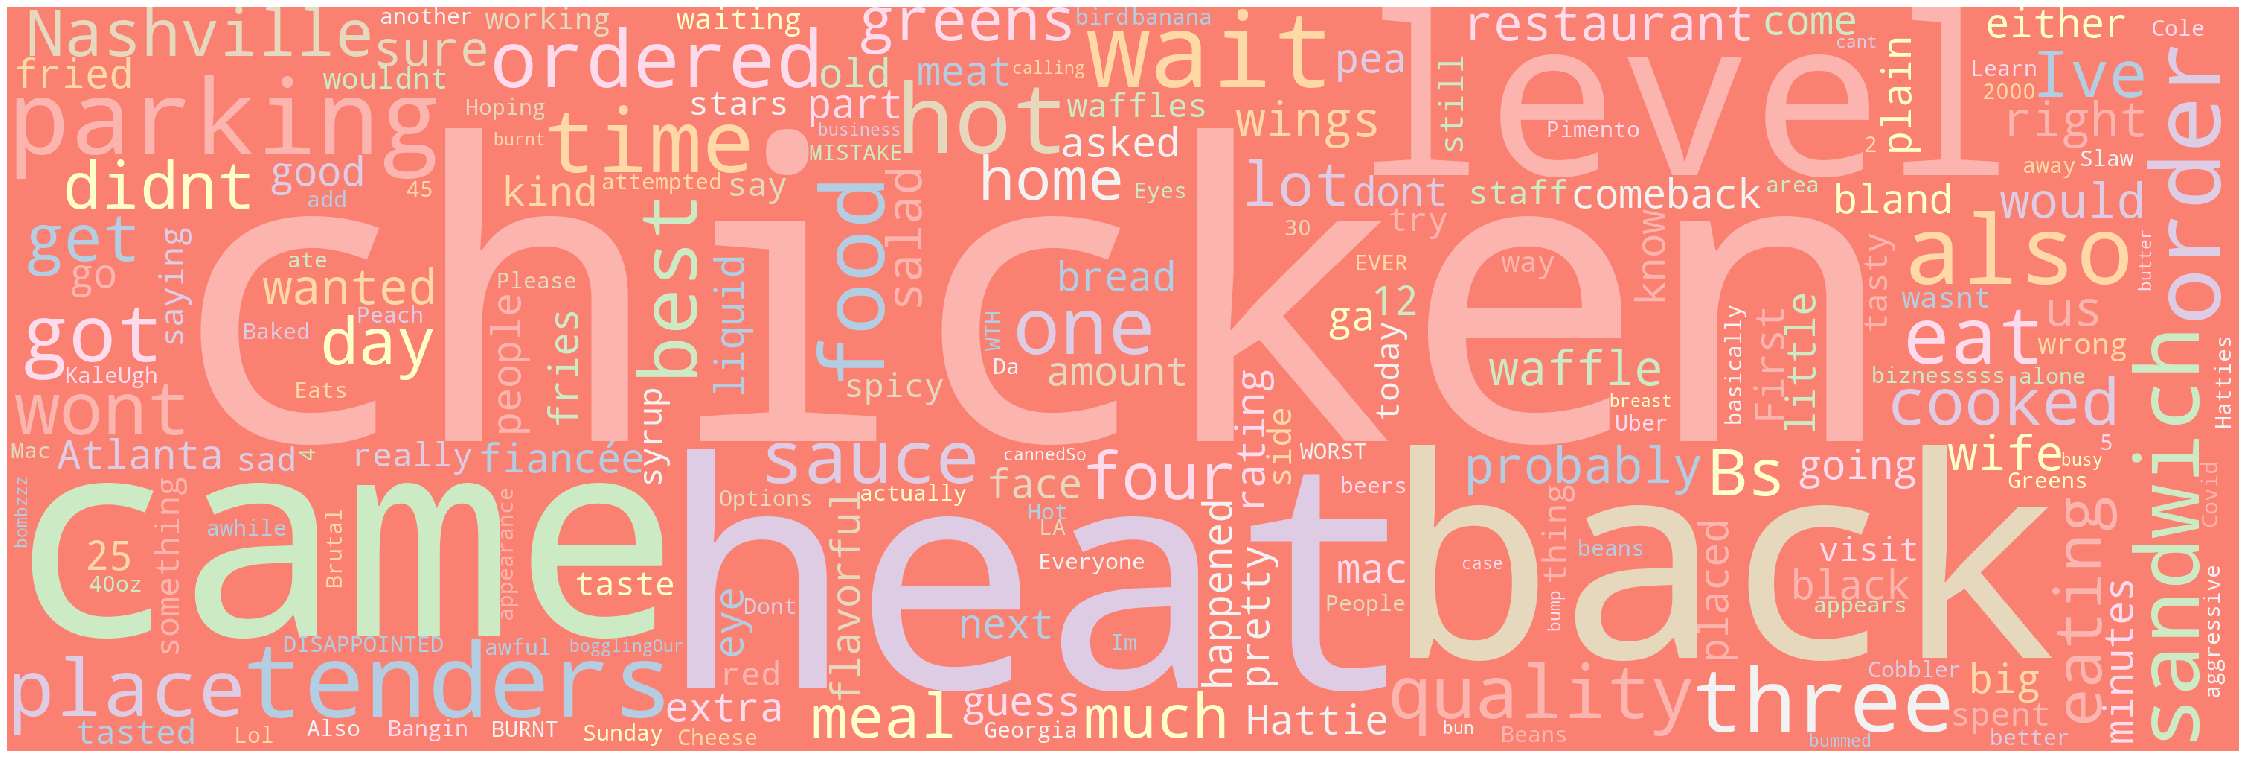

In [129]:
#Plotting negative words
data = negative_words
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
    
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 1000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate_from_frequencies(data)
# Plot
plot_cloud(wordcloud)

In [ ]:
#vectorizing, tokenizing data

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer=text_process)   
cv_fit=cv.fit_transform(df4['text'])    


#creating key value dicitionary pair of counts
word_list = cv.get_feature_names();    
count_list = cv_fit.toarray().sum(axis=0)   


final = dict(zip(word_list, count_list))
print(final)

import operator
sorted(final.items(), key=operator.itemgetter(1), reverse=True)

In [610]:
#vectorizing, tokenizing data

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer=text_process)   
cv_fit=cv.fit_transform(df4['text'])    


In [ ]:
#creating key value dicitionary pair of counts
word_list = cv.get_feature_names();    
count_list = cv_fit.toarray().sum(axis=0)   


final = dict(zip(word_list, count_list))
print(final)

In [383]:
#outdated
bow_transformer = CountVectorizer(analyzer=text_process).fit(x)

In [428]:
#looking at the words from highest to lowest frequency
import operator
sorted(final.items(), key=operator.itemgetter(1), reverse=True)

[('food', 6451),
 ('place', 5174),
 ('good', 3554),
 ('great', 3389),
 ('service', 3129),
 ('time', 2868),
 ('back', 2756),
 ('like', 2623),
 ('get', 2443),
 ('one', 2259),
 ('go', 2252),
 ('restaurant', 2069),
 ('order', 2022),
 ('us', 1991),
 ('would', 1974),
 ('delicious', 1836),
 ('ordered', 1722),
 ('always', 1690),
 ('really', 1682),
 ('best', 1681),
 ('chicken', 1642),
 ('menu', 1576),
 ('amazing', 1573),
 ('try', 1560),
 ('love', 1559),
 ('also', 1520),
 ('got', 1511),
 ('Ive', 1503),
 ('even', 1482),
 ('Im', 1426),
 ('dont', 1379),
 ('wait', 1366),
 ('friendly', 1343),
 ('come', 1325),
 ('staff', 1325),
 ('never', 1245),
 ('came', 1243),
 ('well', 1238),
 ('definitely', 1171),
 ('eat', 1166),
 ('recommend', 1159),
 ('fresh', 1153),
 ('nice', 1128),
 ('experience', 1114),
 ('ever', 1098),
 ('didnt', 1065),
 ('make', 1050),
 ('could', 1038),
 ('made', 1033),
 ('pizza', 1030),
 ('people', 1028),
 ('first', 1013),
 ('favorite', 993),
 ('said', 992),
 ('table', 970),
 ('sauce', 958

In [395]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
    
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 1000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate_from_frequencies(final)
# Plot
plot_cloud(wordcloud)

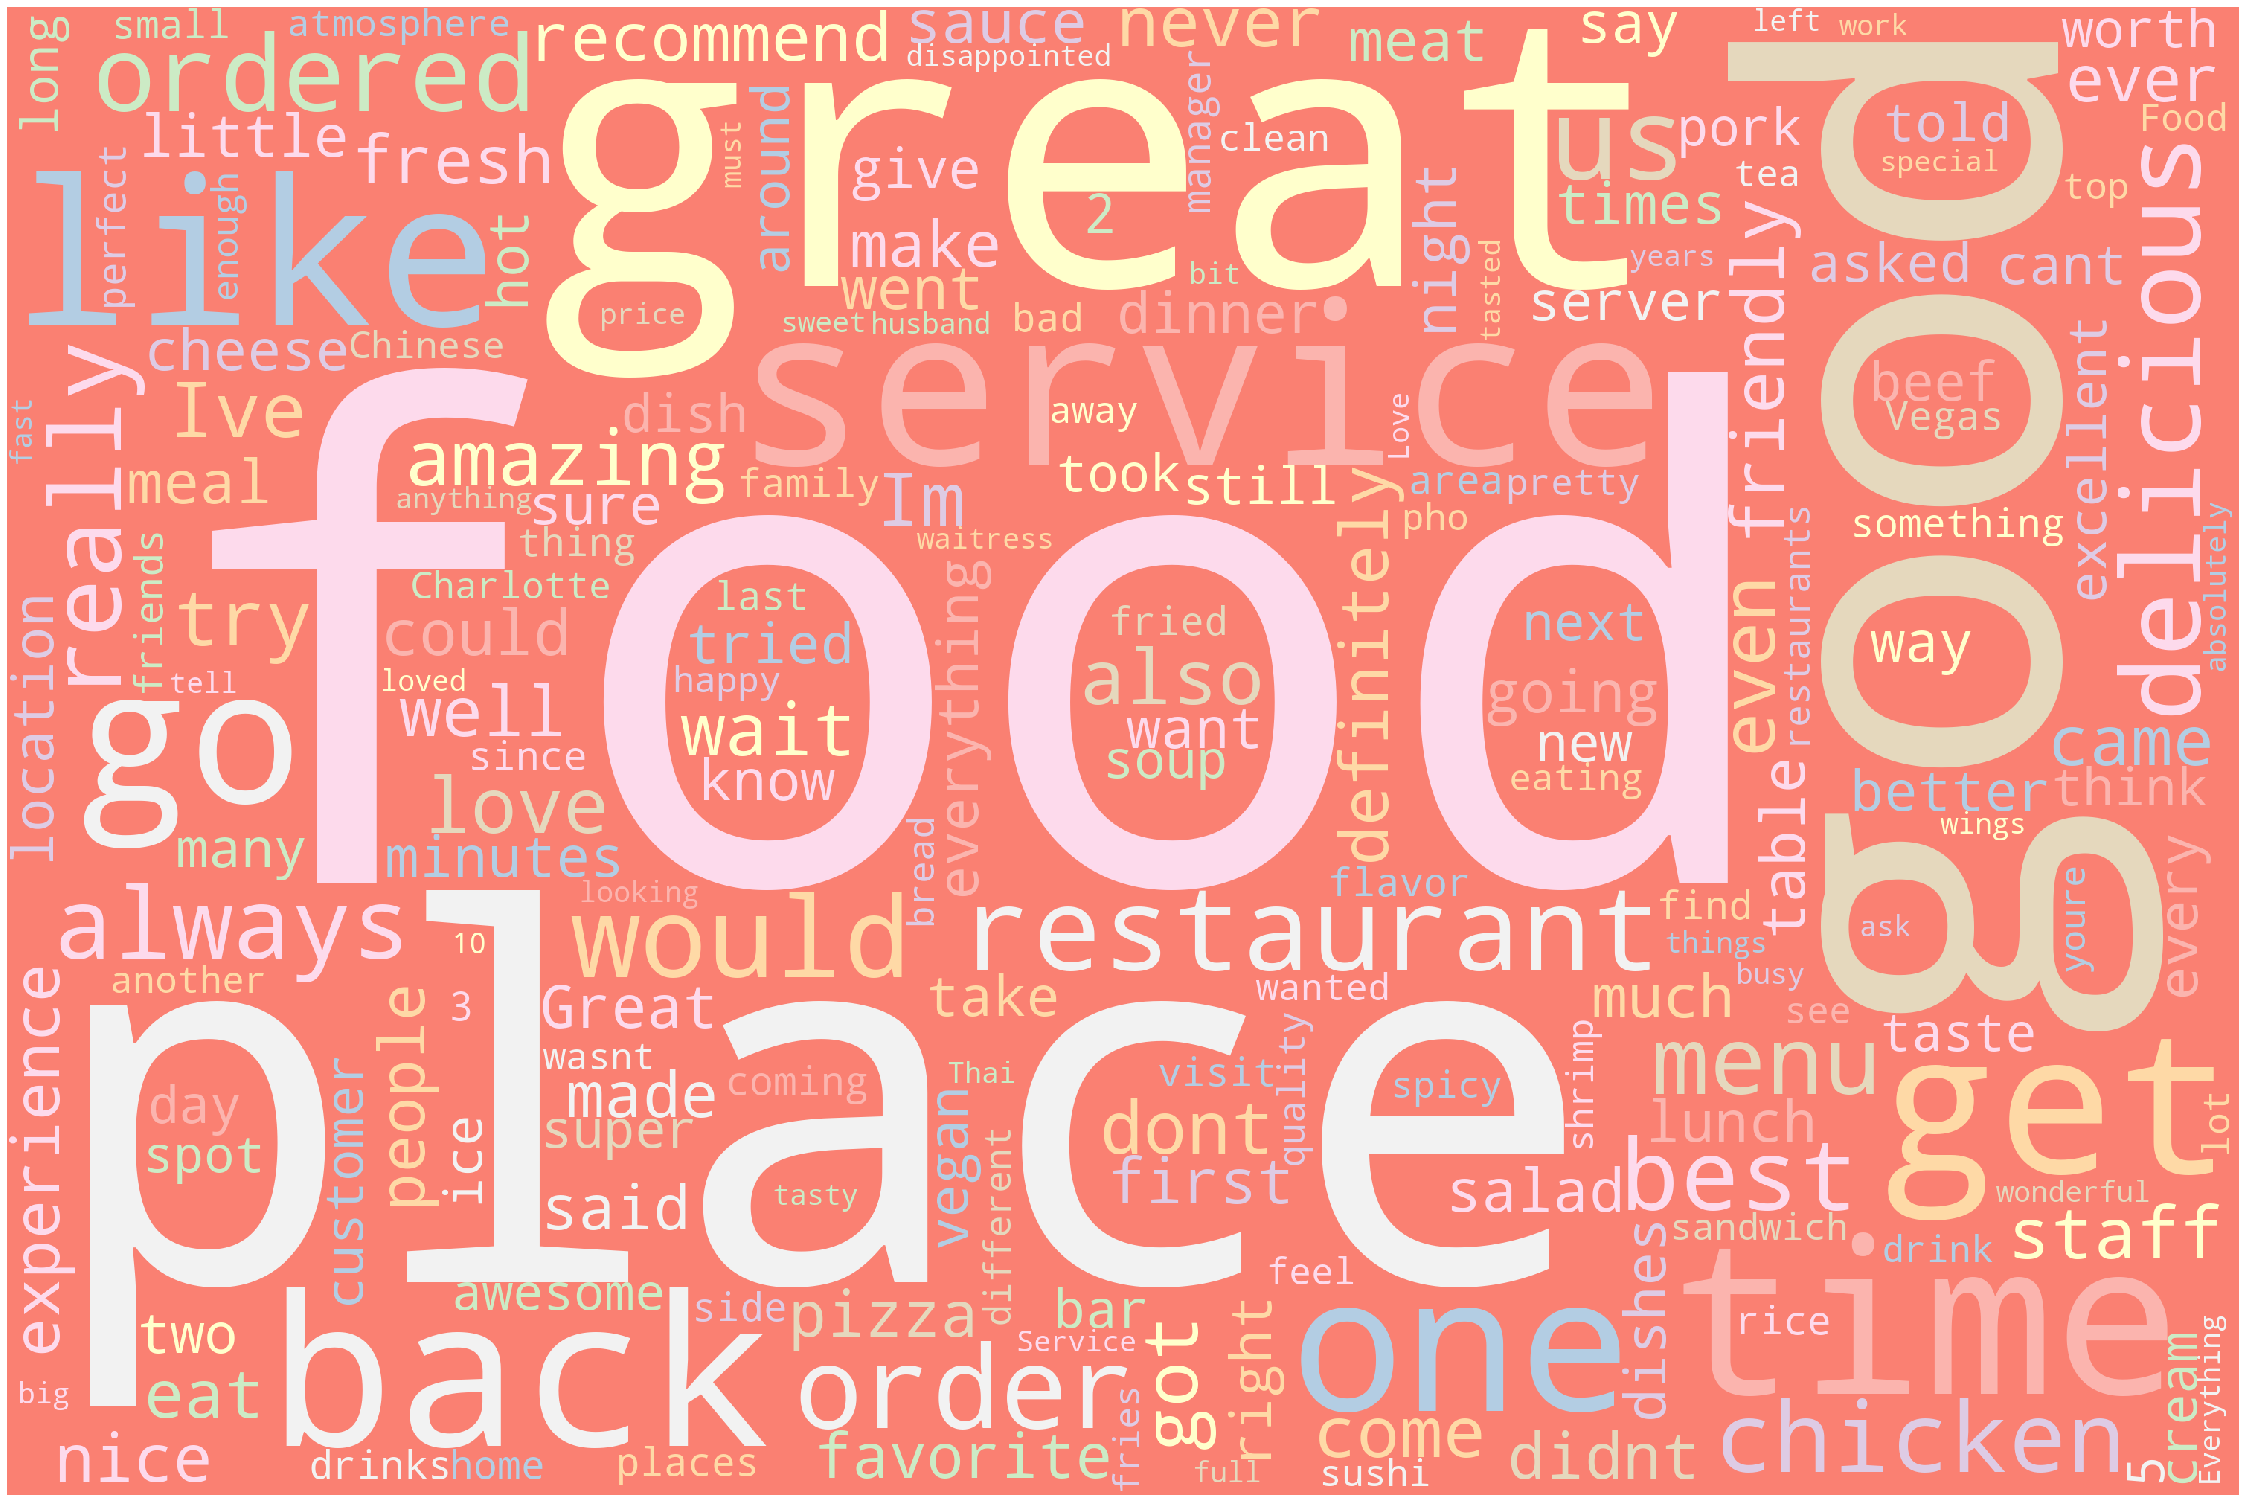

In [430]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 1000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate_from_frequencies(final)
# Plot
plot_cloud(wordcloud)

In [431]:
print(STOPWORDS)

{'however', 'other', 'then', 'below', 'through', 'that', "he'll", "it's", 'between', "where's", 'under', 'above', 'been', 'there', 'k', 'we', 'was', 'at', "wouldn't", "they've", 'to', 'for', 'just', "haven't", 'otherwise', 'and', 'having', 'than', 'its', 'her', 'hers', "can't", "hasn't", 'who', "she'll", 'http', 'should', 'yourself', 'because', 'being', "we've", "wasn't", "hadn't", 'on', 'www', 'ours', 'with', 'you', 'your', 'or', "i'm", 'in', "shan't", "couldn't", "isn't", 'did', 'do', 'own', 'be', "let's", 'she', "they'll", 'each', 'would', 'they', 'theirs', 'off', 'i', "here's", "they'd", 'could', 'like', 'both', "i'd", "we're", 'this', 'not', 'have', 'ever', 'r', 'any', "mustn't", 'all', 'has', 'while', 'why', 'me', 'about', 'before', 'but', "you're", 'by', 'few', "he'd", 'had', "shouldn't", 'these', 'same', "she's", 'so', "there's", "they're", 'those', 'an', 'are', "don't", "i'll", 'which', 'until', "you've", 'therefore', 'into', 'am', 'again', 'from', 'if', 'myself', 'it', 'only'

In [568]:
#converting into a sparse matrix (will have to repeat for web-scraped data)
X = cv.transform(x)

In [569]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))


Shape of Sparse Matrix:  (10000, 27438)
Amount of Non-Zero occurrences:  406349
Density: 0.14809716451636418


In [570]:
#Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [571]:
#importing specific ML model, fitting model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

#testing model
predictions = nb.predict(X_test)

In [572]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[ 612   69]
 [  44 2275]]


              precision    recall  f1-score   support

           1       0.93      0.90      0.92       681
           5       0.97      0.98      0.98      2319

    accuracy                           0.96      3000
   macro avg       0.95      0.94      0.95      3000
weighted avg       0.96      0.96      0.96      3000



In [573]:
#Find positive review
positive_review = review[4:5]
print(f" Positive Review Text: {positive_review.text}")
positive_review['text']

 Positive Review Text: 5    The cheese steak is great here. The guys cooki...
Name: text, dtype: object


5    The cheese steak is great here. The guys cooki...
Name: text, dtype: object

In [706]:
#Getting Sample Review
from random import randint
n = randint(1, len(df4))
#n = 3291
print(f"Randomizer ID: {n}\n---------------------------------")

#Pulling up info for sample review
sample_review = df4['text'][n]
actual = df4['review_stars'][n]
restaurant = df4['name'][n]
# print(sample_review)
# print(sample_score)
      
      
#Transform random review
review_transformed = cv.transform([sample_review])
      
      
#generating predicted score value      
predicted = nb.predict(review_transformed)[0]

if predicted == actual:
    status = 'Success!!'
else: status = 'Fail'
        
print(f"Restaurant Name: {restaurant}")
print(f"Review Text: {sample_review} \n")
print(f"ML Predicted Yelp Review Score: {predicted}")
print(f"Actual Yelp Review Score: {actual}\n")
print(f"Status: {status}")

Randomizer ID: 38
---------------------------------
Restaurant Name: Amir
Review Text: 1h15 d'attente pour recevoir mon repas. Le tout était froid et quand j'ai appelé au restaurant ils m'ont racrocher au nez. Ridicule !! 

ML Predicted Yelp Review Score: Positive
Actual Yelp Review Score: 1

Status: Fail


In [705]:
#Getting Sample Review
from random import randint
n = randint(1, len(df4))
#n = 3291
print(f"Randomizer ID: {n}\n---------------------------------")

#Pulling up info for sample review
#sample_review = 'this place is dog shit garbage, never coming back fuck this trash'
#actual = 1
#restaurant = 'mcdonalds'
# print(sample_review)
# print(sample_score)
      
      
#Transform random review
review_transformed = cv.transform([sample_review])
      
      
#generating predicted score value      
predicted = nb.predict(review_transformed)[0]

if predicted == actual:
    status = 'Success!!'
else: status = 'Fail'
        
print(f"Restaurant Name: {restaurant}")
print(f"Review Text: {sample_review} \n")
print(f"ML Predicted Yelp Review Score: {predicted}")
print(f"Actual Yelp Review Score: {actual}\n")
print(f"Status: {status}")

Randomizer ID: 38
---------------------------------
Restaurant Name: Lelulos Pizzeria
Review Text: Best pizza place in plum boro by far!!! The hand spun crust ... sweet sauce.. the garlic butter.. Patyn and Rhiannon are awesome!!!! They go above and BEYOND for their customers!!! Nothing else compares!!! 

ML Predicted Yelp Review Score: Positive
Actual Yelp Review Score: 5

Status: Fail


In [ ]:
#wordcloud module

#have a list of all the reviews for a restaurant
#split it into two dfs: one that has all the 1 star reviews, 1 that has all the 5 star reviews
#make a word cloud of the top words from each DF

In [ ]:
#ML demo module

#web scrape and put all the reviews of the looked-up restaurants in a DF
#run the code above to randomly select one from here 

In [557]:
sample_review = pd.DataFrame({'Data':['this place is garbage, I am never coming back I can promise you that much'],'Review' : [0]  })
sample_review

,Data,Review
0,"this place is garbage, I am never coming back ...",0


In [1]:
#applying it

#sample_review = pd.DataFrame({'Data':['this place is garbage, I am never coming back I can promise you that much'],'Review' : [0]  })
sample_review = "Hattie B's has perfected spicy chicken. This was hard for me to admit, as I am from New Orleans and have strong feelings about Louisiana chicken, but nothing that I've had beats Hattie b's. It's even worth the really long wait.you. The variety and quality of the sides is also impressive."

actual = 5;




      
#Transform random review
review_transformed = cv.transform([sample_review])
print(review_transformed)
      
      
#generating predicted score value     
predicted = nb.predict((review_transformed))[0]

if predicted == actual:
    status = 'Success!!'
else: status = 'Fail'
        
print(f"Restaurant Name: {restaurant}")
print(f"Review Text: {sample_review} \n")
print(f"ML Predicted Yelp Review Score: {predicted}")
print(f"Actual Yelp Review Score: {actual}\n")
print(f"Status: {status}")

NameError: name 'cv' is not defined